# ## Some ideas for a numerical solution to the SPACE model: Stream Power with Alluvium Conservation and Entrainment

## Using a local analytical solution for H at each node at each time step

Basic equation set so far, for 1D. Sediment flux downstream:

$$\frac{dq_s}{dx} = K_s q S (1-\exp (-H/H_* ) ) + (1-F_f) K_r q S \exp (-H/H_*) -Vq_s/q$$

Rate of change of alluv thickness:

$$(1-\phi ) \frac{\partial H}{\partial t} = V q_s/q - K_s q S (1-\exp (-H/H_* ) )$$

Rate of change of rock elev:

$$\frac{\partial R}{\partial t} = U - K_r q S \exp (-H/H_* )$$

Local analytical solution for sediment flux within a cell:

$$q_s = \left( \frac{E_s+(1-F_f)E_r}{V/q} \right) \left( 1-\exp (-Vx/q) \right) + q_{s0} \exp (-Vx/q)$$

Try a little 1D version with some initial slope $S_0$:

In [56]:
import numpy as np
import matplotlib.pyplot as plt

num_nodes = 50
dx = 1.0
S0 = 0.01
V = 0.001 # settling velocity
Ff = 0.5
Ks = 0.1 # sed erodibility. not necessarily realistic
Kr = 0.0001
Hstar = 0.1 # sed thickness req'd for full entrainment potential. Not necessarily realistic.
dt = 1000.0 # seconds
total_time = 500000.0
num_time_steps = int(total_time / dt)
U = 1.0e-7 # 1.0e-7 is still ~3m/year
r = 0.2 # some runoff factor

# array index
upper = np.arange(num_nodes-1)

# arrays
q = (np.arange(num_nodes) + 1)* dx * r # q = distance downstream * r
Voverq = V/q 
qs = np.zeros(num_nodes)
qs_in = np.zeros(num_nodes)
x = dx * np.arange(0, num_nodes)
H = np.zeros(num_nodes)
R = np.zeros(num_nodes)
z = (S0 * (num_nodes - 1) * dx - S0 * x)
R[:] = z

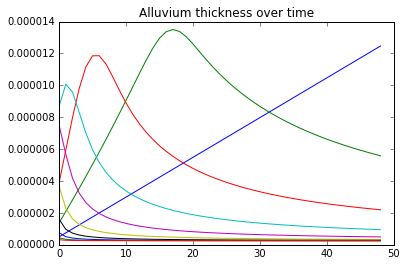

In [57]:
%matplotlib inline

for i in range(num_time_steps):
    # calculate slope
    S = (z[upper] - z[1:]) / dx
    
    # calculate Es and Er using H from previous time step?
    Es = Ks * q[upper] * S * (1.0 - np.exp(-H[upper] / Hstar))
    
    Er = Kr * q[upper] * S * np.exp(-H[upper] / Hstar)
    
    for j in range (num_nodes - 1):
        # calculate qs from H of previous time step
        qs[j] = (((Es[j]) + (1-Ff) * Er[j]) / Voverq[j]) * (1.0 - np.exp(-dx * Voverq[j])) + (qs_in[j] * np.exp(-dx * Voverq[j]))
        qs_in[j+1] = qs[j]
        
        # calculate H using the qs that was just found?
        # log is natural log
        H[j] = Hstar * np.log(((V * qs[j] * Kr)/(U * q[j] * Ks))+1)
        
    # not doing an analytical solution for R (?)    
    R[upper] += dt * (U - Kr * q[upper] * S * (np.exp(-H[upper] / Hstar)))
    
    if i % 50 == 0:
        plt.plot(H[:-1])
        plt.title('Alluvium thickness over time')
    
    z = R + H


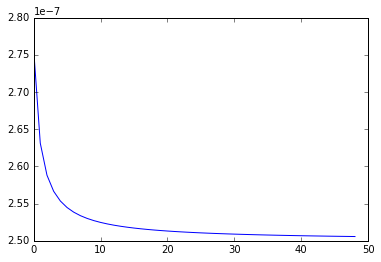

In [58]:
plt.plot(H[:-1])

In [59]:
H

array([  2.75915410e-07,   2.63125828e-07,   2.58819450e-07,
         2.56653392e-07,   2.55347561e-07,   2.54473559e-07,
         2.53847159e-07,   2.53375971e-07,   2.53008531e-07,
         2.52713888e-07,   2.52472301e-07,   2.52270586e-07,
         2.52099597e-07,   2.51952790e-07,   2.51825360e-07,
         2.51713696e-07,   2.51615034e-07,   2.51527222e-07,
         2.51448557e-07,   2.51377676e-07,   2.51313475e-07,
         2.51255050e-07,   2.51201651e-07,   2.51152655e-07,
         2.51107537e-07,   2.51065852e-07,   2.51027223e-07,
         2.50991323e-07,   2.50957872e-07,   2.50926628e-07,
         2.50897378e-07,   2.50869936e-07,   2.50844140e-07,
         2.50819844e-07,   2.50796922e-07,   2.50775260e-07,
         2.50754755e-07,   2.50735319e-07,   2.50716868e-07,
         2.50699330e-07,   2.50682638e-07,   2.50666732e-07,
         2.50651558e-07,   2.50637066e-07,   2.50623211e-07,
         2.50609952e-07,   2.50597251e-07,   2.50585074e-07,
         2.50573388e-07,

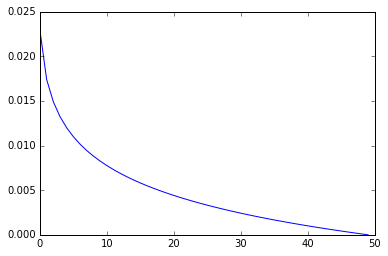

In [48]:
plt.plot(z)

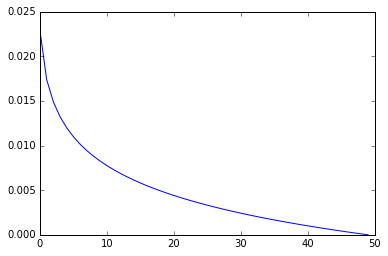

In [49]:
plt.plot(R)

Now, finding the analytical solution for H BEFORE finding qs. Does it make a difference?

In [51]:
import numpy as np
import matplotlib.pyplot as plt

num_nodes = 50
dx = 1.0
S0 = 0.01
V = 0.001 # settling velocity
Ff = 0.5
Ks = 0.1 # sed erodibility. not necessarily realistic
Kr = 0.0001
Hstar = 0.1 # sed thickness req'd for full entrainment potential. Not necessarily realistic.
dt = 1000.0 # seconds
total_time = 500000.0
num_time_steps = int(total_time / dt)
U = 1.0e-7 # 1.0e-7 is still ~3m/year
r = 0.2 # some runoff factor

# array index
upper = np.arange(num_nodes-1)

# arrays
q = (np.arange(num_nodes) + 1)* dx * r # q = distance downstream * r
Voverq = V/q 
qs = np.zeros(num_nodes)
qs_in = np.zeros(num_nodes)
x = dx * np.arange(0, num_nodes)
H = np.zeros(num_nodes)
R = np.zeros(num_nodes)
z = (S0 * (num_nodes - 1) * dx - S0 * x)
R[:] = z

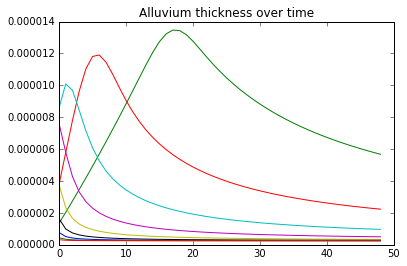

In [52]:
%matplotlib inline

for i in range(num_time_steps):
    # calculate slope
    S = (z[upper] - z[1:]) / dx
    
    # calculate Es and Er using H from previous time step?
    Es = Ks * q[upper] * S * (1.0 - np.exp(-H[upper] / Hstar))
    
    Er = Kr * q[upper] * S * np.exp(-H[upper] / Hstar)
    
    for j in range (num_nodes - 1):
        # calculate H from qs of previous time step
        # log is natural log
        H[j] = Hstar * np.log(((V * qs[j] * Kr)/(U * q[j] * Ks))+1)
        
        # calculate qs using the H that was just found?
        qs[j] = (((Es[j]) + (1-Ff) * Er[j]) / Voverq[j]) * (1.0 - np.exp(-dx * Voverq[j])) + (qs_in[j] * np.exp(-dx * Voverq[j]))
        qs_in[j+1] = qs[j]
        
    # not doing an analytical solution for R (?)    
    R[upper] += dt * (U - Kr * q[upper] * S * (np.exp(-H[upper] / Hstar)))
    
    if i % 50 == 0:
        plt.plot(H[:-1])
        plt.title('Alluvium thickness over time')
    
    z = R + H


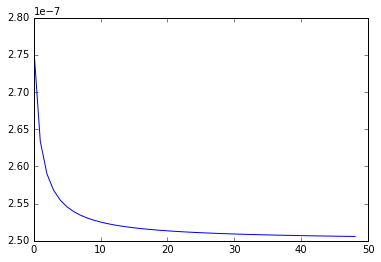

In [54]:
plt.plot(H[:-1])

In [55]:
H

array([  2.76433776e-07,   2.63386163e-07,   2.58993279e-07,
         2.56783920e-07,   2.55452085e-07,   2.54560733e-07,
         2.53921932e-07,   2.53441438e-07,   2.53066756e-07,
         2.52766316e-07,   2.52519985e-07,   2.52314314e-07,
         2.52139977e-07,   2.51990299e-07,   2.51860380e-07,
         2.51746538e-07,   2.51645953e-07,   2.51556431e-07,
         2.51476236e-07,   2.51403978e-07,   2.51338531e-07,
         2.51278971e-07,   2.51224538e-07,   2.51174592e-07,
         2.51128601e-07,   2.51086111e-07,   2.51046734e-07,
         2.51010141e-07,   2.50976045e-07,   2.50944198e-07,
         2.50914384e-07,   2.50886413e-07,   2.50860120e-07,
         2.50835357e-07,   2.50811993e-07,   2.50789914e-07,
         2.50769016e-07,   2.50749206e-07,   2.50730401e-07,
         2.50712526e-07,   2.50695514e-07,   2.50679303e-07,
         2.50663838e-07,   2.50649068e-07,   2.50634948e-07,
         2.50621435e-07,   2.50608491e-07,   2.50596081e-07,
         2.50584172e-07,